In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# import plotly.graph_objects as go
import numpy as np
import tensorflow

In [ ]:

# !pip install -q condacolab
# import condacolab
# condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [ ]:
# !conda create --name my_env python=3.10 numpy=1.22.0 ta-lib
# !conda activate my_env
# !conda install -c conda-forge ta-lib



Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /usr/local/envs/my_env

  added / updated specs:
    - numpy=1.22.0
    - python=3.10
    - ta-lib


The following packages will be downloaded:

    package           

In [ ]:
# !conda activate my_env



CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [3]:
import talib

In [5]:
start = '2023-05-13'
end =  '2023-05-31'

In [6]:

sym='RELIANCE.NS'


In [105]:
fin = yf.download(sym,start,end)
fin_15min = fin.resample('15T').ffill()


[*********************100%***********************]  1 of 1 completed


In [106]:
fin_15min.tail

<bound method NDFrame.tail of                             Open         High          Low        Close  \
Date                                                                      
2023-05-15 00:00:00  2489.899902  2504.550049  2473.149902  2489.250000   
2023-05-15 00:15:00  2489.899902  2504.550049  2473.149902  2489.250000   
2023-05-15 00:30:00  2489.899902  2504.550049  2473.149902  2489.250000   
2023-05-15 00:45:00  2489.899902  2504.550049  2473.149902  2489.250000   
2023-05-15 01:00:00  2489.899902  2504.550049  2473.149902  2489.250000   
...                          ...          ...          ...          ...   
2023-05-29 23:00:00  2521.000000  2530.000000  2507.199951  2520.600098   
2023-05-29 23:15:00  2521.000000  2530.000000  2507.199951  2520.600098   
2023-05-29 23:30:00  2521.000000  2530.000000  2507.199951  2520.600098   
2023-05-29 23:45:00  2521.000000  2530.000000  2507.199951  2520.600098   
2023-05-30 00:00:00  2520.600098  2537.699951  2514.350098  2519.94995

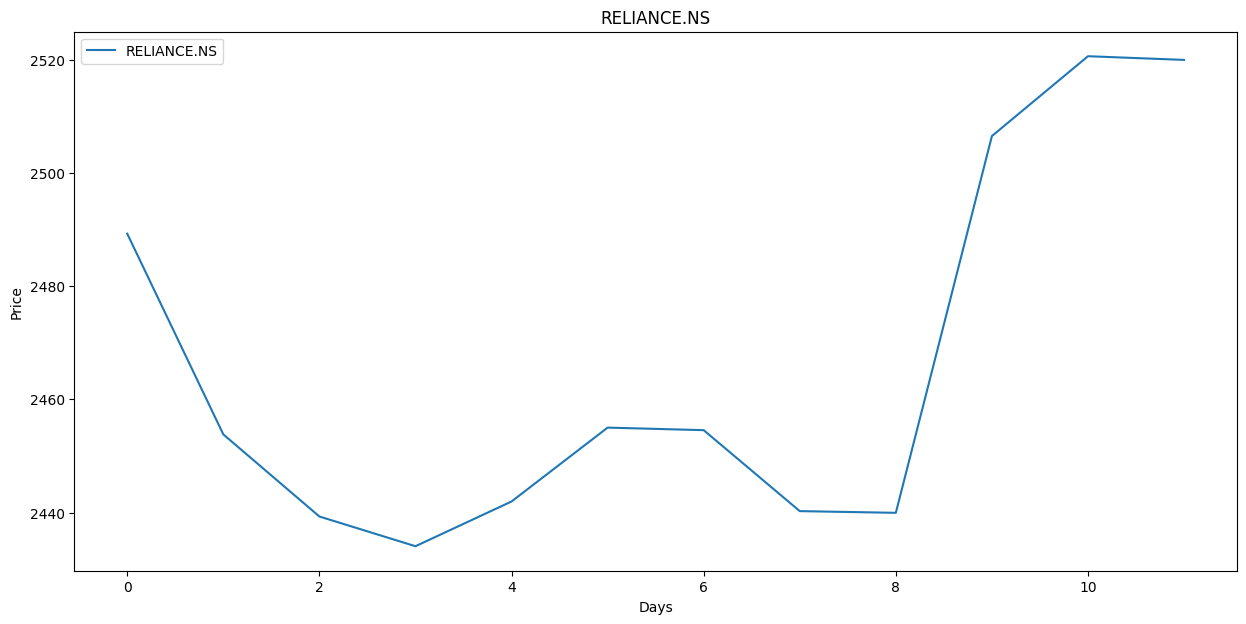

In [107]:
series = fin['Close']
series1 = fin['Open']
series2= fin['High']
series3 = fin['Low']

series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))
plt.title(sym)

plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label=sym)

plt.legend()
plt.show()

In [108]:
# upper, middle, lower = talib.BBANDS(series, matype=talib.MA_Type.T3)
# fin_15min['BB_upper'] = upper
# fin_15min['BB_middle'] = middle
# fin_15min['BB_lower'] = lower
fin_15min['up_band'], fin_15min['mid_band'], fin_15min['low_band'] = talib.BBANDS(fin_15min['Close'], timeperiod =20)
fin_15min

,Open,High,Low,Close,Adj Close,Volume,up_band,mid_band,low_band
Date,,,,,,,,,
2023-05-15 00:00:00,2489.899902,2504.550049,2473.149902,2489.250000,2489.250000,3153587,NaN,NaN,NaN
2023-05-15 00:15:00,2489.899902,2504.550049,2473.149902,2489.250000,2489.250000,3153587,NaN,NaN,NaN
2023-05-15 00:30:00,2489.899902,2504.550049,2473.149902,2489.250000,2489.250000,3153587,NaN,NaN,NaN
2023-05-15 00:45:00,2489.899902,2504.550049,2473.149902,2489.250000,2489.250000,3153587,NaN,NaN,NaN
2023-05-15 01:00:00,2489.899902,2504.550049,2473.149902,2489.250000,2489.250000,3153587,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-05-29 23:00:00,2521.000000,2530.000000,2507.199951,2520.600098,2520.600098,4619754,2520.600098,2520.600098,2520.600098
2023-05-29 23:15:00,2521.000000,2530.000000,2507.199951,2520.600098,2520.600098,4619754,2520.600098,2520.600098,2520.600098
2023-05-29 23:30:00,2521.000000,2530.000000,2507.199951,2520.600098,2520.600098,4619754,2520.600098,2520.600098,2520.600098


In [109]:
closing_prices=pd.DataFrame()
closing_prices['Close']=fin_15min['Close']
closing_prices



,Close
Date,
2023-05-15 00:00:00,2489.250000
2023-05-15 00:15:00,2489.250000
2023-05-15 00:30:00,2489.250000
2023-05-15 00:45:00,2489.250000
2023-05-15 01:00:00,2489.250000
...,...
2023-05-29 23:00:00,2520.600098
2023-05-29 23:15:00,2520.600098
2023-05-29 23:30:00,2520.600098


In [110]:
closing_prices['EMA13'] = pd.Series.ewm(closing_prices['Close'], span = 13).mean()
closing_prices

,Close,EMA13
Date,,
2023-05-15 00:00:00,2489.250000,2489.250000
2023-05-15 00:15:00,2489.250000,2489.250000
2023-05-15 00:30:00,2489.250000,2489.250000
2023-05-15 00:45:00,2489.250000,2489.250000
2023-05-15 01:00:00,2489.250000,2489.250000
...,...,...
2023-05-29 23:00:00,2520.600098,2520.600089
2023-05-29 23:15:00,2520.600098,2520.600090
2023-05-29 23:30:00,2520.600098,2520.600092


In [111]:
closing_prices['EMA50'] = pd.Series.ewm(closing_prices['Close'], span = 50).mean()
closing_prices['up_band'] = fin_15min['up_band']
closing_prices['mid_band'] = fin_15min['mid_band']

closing_prices['low_band'] = fin_15min['low_band']
closing_prices['Low'] = fin_15min['Low']
closing_prices['High'] = fin_15min['High']
closing_prices['Open'] = fin_15min['Open']




closing_prices

,Close,EMA13,EMA50,up_band,mid_band,low_band,Low,High,Open
Date,,,,,,,,,
2023-05-15 00:00:00,2489.250000,2489.250000,2489.250000,NaN,NaN,NaN,2473.149902,2504.550049,2489.899902
2023-05-15 00:15:00,2489.250000,2489.250000,2489.250000,NaN,NaN,NaN,2473.149902,2504.550049,2489.899902
2023-05-15 00:30:00,2489.250000,2489.250000,2489.250000,NaN,NaN,NaN,2473.149902,2504.550049,2489.899902
2023-05-15 00:45:00,2489.250000,2489.250000,2489.250000,NaN,NaN,NaN,2473.149902,2504.550049,2489.899902
2023-05-15 01:00:00,2489.250000,2489.250000,2489.250000,NaN,NaN,NaN,2473.149902,2504.550049,2489.899902
...,...,...,...,...,...,...,...,...,...
2023-05-29 23:00:00,2520.600098,2520.600089,2520.258550,2520.600098,2520.600098,2520.600098,2507.199951,2530.000000,2521.000000
2023-05-29 23:15:00,2520.600098,2520.600090,2520.271944,2520.600098,2520.600098,2520.600098,2507.199951,2530.000000,2521.000000
2023-05-29 23:30:00,2520.600098,2520.600092,2520.284813,2520.600098,2520.600098,2520.600098,2507.199951,2530.000000,2521.000000


In [112]:
worth=100000
stocks=0

In [113]:
# fin = fin.reset_index()

# fig = go.Figure(data=[go.Candlestick(x=fin['Date'],
#                 open=fin['Open'],
#                 high=fin['High'],
#                 low=fin['Low'],
#                 close=fin['Close'])])

# fig.show()

In [114]:
print(fin.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [115]:
# # reliance_final = closing_prices[closing_prices['EMA50'].notnull()]
# # reliance_final = reliance_final.reset_index()
# # reliance_final = reliance_final.filter(['Close', 'EMA13', 'EMA50', 'Cash', 'Shares','comparison_result'])
# # reliance_final ['Cash']=0
# # reliance_final ['Shares']=0
# # reliance_final.iloc[0,4] = 100000
# # # print(reliance_final.head())

# # worth=100000

# # def compare_elements(row):
# #     return row['EMA13'] > row['EMA50']
# worth=100000
# reliance_final = closing_prices[closing_prices['EMA50'].notnull()]
# reliance_final = reliance_final.reset_index()
# def compare_elements(row):
#     return row['EMA13'] > row['EMA50']

# # df= pd.DataFrame({closing_prices['EMA13'], closing_prices['EMA50']})
# reliance_final['comparison_result'] = reliance_final.apply(compare_elements, axis=1)
# # df= pd.DataFrame({closing_prices['EMA13'], closing_prices['EMA50']})


# reliance_final = reliance_final.filter(['Close', 'EMA13', 'EMA50', 'comparison_result','Cash', 'Shares'])

# reliance_final ['Cash']=0
# reliance_final ['Shares']=0

# reliance_final.iloc[0, 4] = 100000
# # reliance_final.iloc[0, 6] = 100000

# # print(reliance_final.head())



# # print(reliance_final['compare_elements'])
# # closing_prices['comparison_result'] = closing_prices.apply(compare_elements, axis=1)
# # pd.set_option('display.max_rows', None)
# # print(closing_prices.head(500))

# tookTrade = False

# j=0
# k=0
# index=0

# for index in range(len(reliance_final)):
#   worth=reliance_final.iloc[index,4]
#   stocks=reliance_final.iloc[index,5]
#   comp=reliance_final.iloc[index,3]
#   ema50=reliance_final.iloc[index,2]
#   cash = worth
#   shares=stocks
#   close=reliance_final.iloc[index,0]

#   # f15close=reliance_final.iloc[index,8]
#   # if(high<bbl):
#   #   tookTrade =True
#   #   shares = (cash/close)
#   #   #  print(fin_15min['Close'])
#   #   cash = 0
#   #   j=j+1
#   # if(f15close<ema50):
#   #   tookTrade = False
#   #   cash = shares*(close)
#   #   shares=0
#   #   k=k+1
#   if(comp==True and tookTrade==False):
#     tookTrade =True
#     shares = (cash/close)
#     #  print(fin_15min['Close'])
#     cash = 0
#     j=j+1

#   if(comp==False and tookTrade == True):
#     tookTrade = False
#     cash = shares*(close)
#     shares=0
#     k=k+1

#   reliance_final.iloc[index, 4] = cash
#   reliance_final.iloc[index, 5] =shares
#   # reliance_final.iloc[index, 6] =shares*close+cash

#   try:
#     reliance_final.iloc[index + 1, 4] = reliance_final.iloc[index, 4]
#     reliance_final.iloc[index + 1, 5] = reliance_final.iloc[index, 5]
#   except:
#     pass

# reliance_final.iloc[index,4]= shares*close
# # reliance_final.iloc[index,5]= 0

# # for i in closing_prices['comparison_result'].items():
# #   # print(i[1])
# #   worth=reliance_final.iloc[i[0],3]
# #   stocks=reliance_final.iloc[i[0],4]
# #   if(i[1]==True and tookTrade==False):

# #     #  print(worth)
# #      tookTrade =True
# #      stocks = stocks + (worth/fin_15min['Close'])
# #     #  print(fin_15min['Close'])
# #      worth = worth-stocks*(fin_15min['Close'])
# #      j=j+1

# #   if(i[1]==False and tookTrade == True):
# #     tookTrade = False
# #     worth = worth + stocks*(fin_15min['Close'])
# #     stocks=0
# #     k=k+1

# # for i in closing_prices['EMA13'].count():

# #             # compare the values in row1 and row2
# #         if i>:
# #                 stocks = stocks + (worth/fin_15min['Close'])
# #                 worth = worth-stocks*(fin_15min['Close'])
# #             # else:
# #             #     print(f"Values in row {i} and row {j} are not equal.")

# print(reliance_final.head(100))

# # closing_prices['comparison_result'] = closing_prices.apply(compare_elements, axis=1)
# # pd.set_option('display.max_rows', None)
# # print(closing_prices.head(500))



In [116]:

# print(stocks)
# print(reliance_final.tail())
# print(k)
# print(j)

In [117]:
buyarray=[]
sellarray=[]

In [120]:
def calculator(stage,closing_prices,i):
    if(stage==0):
        
        ##origin
        if(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
            # print("1")
            return 1
        elif(closing_prices["Close"][i]<closing_prices["EMA13"][i]):
            return 6
        else:
            return 0
    elif(stage==1):
        #sell ka chance 1
        # if(closing_prices["High"][i]<closing_prices["up_band"][i]):
        #     return 0
        #     #go to origin
        if(closing_prices["Close"][i]<closing_prices["EMA13"][i]):
            return 2
            #go to sell ka chance 2
        elif(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
            return 1
            #continue
    elif(stage==2):
        ####sell ka chance 2
        if(closing_prices["High"][i]<closing_prices["up_band"][i]):
            return 0
            # go to origin
        elif(closing_prices["Close"][i]<closing_prices["EMA13"][i]):
            return 2
            #continue
        elif(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
            return 3
            #go to sell ka chance 3
    elif(stage==3):
        ####sell ka chance 3
        if(closing_prices["High"][i]<closing_prices["up_band"][i]):
            return 0
            # go to origin
        elif(closing_prices["Close"][i]<closing_prices["EMA13"][i]):
            return 4
            #sell pe jao 
        elif(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
            return 3
            #continue
    elif(stage==4):
        ####sell
        ####sell ka chance 2
        if(((closing_prices["EMA50"][i]-closing_prices["Low"][i])/closing_prices["Low"][i])<0.1):
            return 5
            # continue
        elif(closing_prices["EMA50"][i]==closing_prices["Low"][i]):
            return 5
            # continue
        elif(closing_prices["EMA50"][i]>closing_prices["Close"][i]):
            return 6
            #go to sell ka chance 3
    elif(stage==5):
        ####net zero
        #    print("Net0")
           return 0
    elif(stage==6):
        #buy ka chance 1
        # if(closing_prices["Low"][i]>closing_prices["low_band"][i]):
        #    return 0
        if(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
           return 7
        elif(closing_prices["Close"][i]<closing_prices["EMA13"][i]):
            return 6
        
    elif(stage==7):
        #buy ka chance 2
        if(closing_prices["Low"][i]<closing_prices["low_band"][i]):
           return 0
        elif(closing_prices["Close"][i]<closing_prices["EMA13"][i]):
           return 8
        elif(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
           return 7
        
    elif(stage==8):
        #buy ka chance 3
        if(closing_prices["Low"][i]<closing_prices["low_band"][i]):
           return 0
        elif(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
            return 9
        elif(closing_prices["Close"][i]>closing_prices["EMA13"][i]):
            return 8
        
    elif(stage==9):
        #buy
        if(((closing_prices["High"][i]-closing_prices["EMA50"][i])/closing_prices["High"][i])<0.1):
            return 5
        elif(closing_prices["EMA50"][i]==closing_prices["High"][i]):
            return 5
        elif(closing_prices["EMA50"][i]<closing_prices["Close"][i]):
            return 1

In [121]:
b=0
s=0
stage=0
prev=0
for i in range (20,len(closing_prices)):
    prev = stage
    print(stage)

    stage=calculator(stage,closing_prices,i)
    if(stage==4):
        sellarray.append(closing_prices["Close"][i])

    elif(stage==9):
        buyarray.append(closing_prices["Close"][i])
    elif(stage==5):
        print("5")
        if(prev==9):
            sellarray.append(closing_prices["Close"][i])
        elif(prev==4):
            buyarray.append(closing_prices["Close"][i])
    
print(buyarray)
print(sellarray)

profit = sum(buyarray)-sum(sellarray)
print(profit)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
